In [11]:
import pandas as pd
path_in="/home/noura369/Documents/Basic_NOURA2/ABC/titanic-passengers.csv"
df =pd.read_csv(path_in,sep=';')
df.isnull().sum()
#df.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
#plt.subplots(figsize=(5, 5))
#sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
#plt.show()

In [15]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
#preparing data for logistic regression
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#preparing data for logistic regression
df["Sex"]=df["Sex"].map({"male": 1, "female": 0})   
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [109]:
#preparing data for logistic regression
#df["Embarked"]=df["Embarked"].map({"S": 1, "NaN": 0})   
#df.head()

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
#features extraction
x = df[['Pclass', 'Sex','Age','Fare','SibSp','Parch']]
y = df['Survived']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

In [23]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data

LogisticRegression()

In [27]:
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


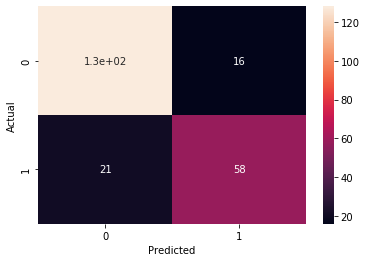

In [29]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

ROC AUC: 0.86


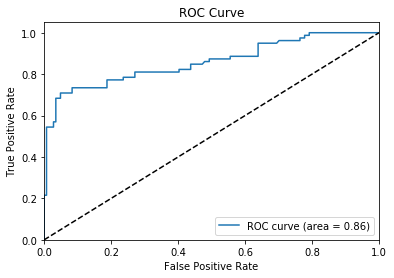

In [35]:
#AUC classification matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [1]:
#The ROC AUC Score is the corresponding score to the ROC/ AUC Curve. It is  computed by measuring the area under the curve, which is called AUC.
#A classifier that is 100% correct would have a ROC AUC Score of 1
# here We got a 86% ROC AUC Score.
# I got it from this site :https://www.linkedin.com/pulse/what-i-learned-analyzing-famous-titanic-dateset-murilo-gustineli